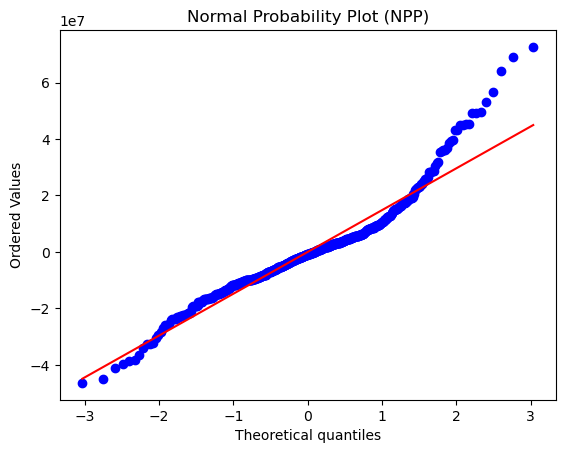

Equation:
MarketValue = -60279900.340*Intercept + 964549.700*FIFARating + 1395.158*MinutesPlayed + 1754985.157*GAContribution + 1074446.813*FantasyScore

R-squared: 0.554, Adjusted R-squared: 0.551

Durbin-Watson Score: 0.911

ANOVA Table:
                   df        sum_sq       mean_sq        F        PR(>F)
FIFARating        1.0  1.071785e+17  1.071785e+17  455.682  8.985168e-75
MinutesPlayed     1.0  1.692580e+16  1.692580e+16   71.962  1.887352e-16
GAContribution    1.0  4.249245e+16  4.249245e+16  180.662  5.569977e-36
FantasyScore      1.0  3.869476e+14  3.869476e+14    1.645  2.001403e-01
Residual        571.0  1.343018e+17  2.352045e+14      NaN           NaN

Coefficients Table (with VIF):
         Variable   Coefficient  Standard Error  t-value         P>|t|    VIF
0       Intercept -6.027990e+07     7294039.543   -8.264  9.868154e-16    NaN
1      FIFARating  9.645497e+05      109298.084    8.825  1.333982e-17  1.949
2   MinutesPlayed  1.395158e+03         914.529    1.526

In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv('/Users/niloy74/UoB/Data Analytics and Predictive Modelling/report.csv')

# Select only quantitative columns
quantitative_cols = ['FIFARating', 'MinutesPlayed', 'GAContribution', 'FantasyScore', 'MarketValue']
df_quant = df[quantitative_cols].dropna()  # Drop rows with missing values

# Create a formula for the regression model
formula = 'MarketValue ~ FIFARating + MinutesPlayed + GAContribution + FantasyScore'

# Fit the regression model using the formula
model = smf.ols(formula=formula, data=df_quant).fit()

# Calculate VIF scores
X_vif = df_quant[['FIFARating', 'MinutesPlayed', 'GAContribution', 'FantasyScore']]
X_vif = sm.add_constant(X_vif)  # Add constant for intercept
vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# Outputs
# 1. Equation
coefficients = model.params
equation = "MarketValue = " + " + ".join([f"{coefficients[name]:.3f}*{name}" for name in coefficients.index])

# 2. R-squared and Adjusted R-squared
r2 = model.rsquared
adj_r2 = model.rsquared_adj

# 3. Durbin-Watson Score
dw_score = sm.stats.durbin_watson(model.resid)

# 4. ANOVA Table
anova_results = sm.stats.anova_lm(model, typ=1)
anova_results_rounded = anova_results.copy()
anova_results_rounded.iloc[:, :-1] = anova_results.iloc[:, :-1].round(3)

# 5. Coefficients Table (with VIF)
coeff_table = pd.DataFrame({
    "Coefficient": model.params.round(3),
    "Standard Error": model.bse.round(3),
    "t-value": model.tvalues.round(3),
    "P>|t|": model.pvalues  # Keep p-values unformatted
})
coeff_table = coeff_table.reset_index().rename(columns={"index": "Variable"})
coeff_table = pd.merge(coeff_table, vif_data, on="Variable", how="left")
coeff_table["VIF"] = coeff_table["VIF"].round(3)

# Save tables to Excel
anova_results_rounded.to_excel("anova_results_final.xlsx", index=True)
coeff_table.to_excel("coefficients_with_vif_final.xlsx", index=False)

# 6. Normal Probability Plot (NPP)
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot (NPP)')
plt.show()

# Print Outputs
print(f"Equation:\n{equation}")
print(f"\nR-squared: {r2:.3f}, Adjusted R-squared: {adj_r2:.3f}")
print(f"\nDurbin-Watson Score: {dw_score:.3f}")
print("\nANOVA Table:")
print(anova_results_rounded)
print("\nCoefficients Table (with VIF):")
print(coeff_table)


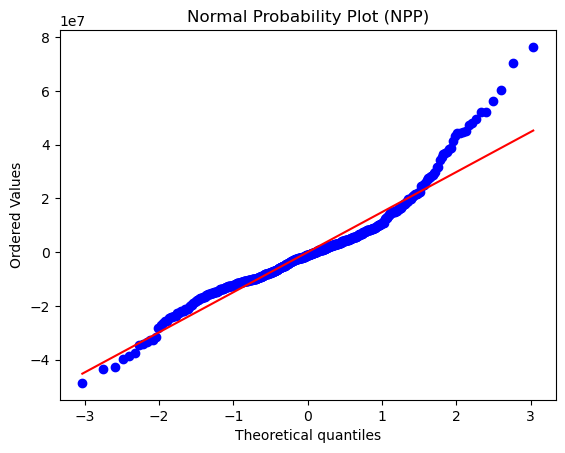

Equation:
MarketValue = -70741889.214*Intercept + 1148199.796*FIFARating + 1988367.414*GAContribution

R-squared: 0.548, Adjusted R-squared: 0.547

Durbin-Watson Score: 0.898

ANOVA Table:
                   df        sum_sq       mean_sq        F        PR(>F)
FIFARating        1.0  1.071785e+17  1.071785e+17  451.214  2.716694e-74
GAContribution    1.0  5.800037e+16  5.800037e+16  244.178  4.128851e-46
Residual        573.0  1.361066e+17  2.375334e+14      NaN           NaN

Coefficients Table (with VIF):
         Variable   Coefficient  Standard Error  t-value         P>|t|    VIF
0       Intercept -7.074189e+07     6210753.411  -11.390  3.100077e-27    NaN
1      FIFARating  1.148200e+06       85505.743   13.428  6.129351e-36  1.181
2  GAContribution  1.988367e+06      127245.828   15.626  4.128851e-46  1.181


In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv('/Users/niloy74/UoB/Data Analytics and Predictive Modelling/report.csv')

# Select only quantitative columns
quantitative_cols = ['FIFARating', 'GAContribution', 'MarketValue']
df_quant = df[quantitative_cols].dropna()  # Drop rows with missing values

# Create a formula for the regression model
formula = 'MarketValue ~ FIFARating + GAContribution'

# Fit the regression model using the formula
model = smf.ols(formula=formula, data=df_quant).fit()

# Calculate VIF scores
X_vif = df_quant[['FIFARating', 'GAContribution']]
X_vif = sm.add_constant(X_vif)  # Add constant for intercept
vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# Outputs
# 1. Equation
coefficients = model.params
equation = "MarketValue = " + " + ".join([f"{coefficients[name]:.3f}*{name}" for name in coefficients.index])

# 2. R-squared and Adjusted R-squared
r2 = model.rsquared
adj_r2 = model.rsquared_adj

# 3. Durbin-Watson Score
dw_score = sm.stats.durbin_watson(model.resid)

# 4. ANOVA Table
anova_results = sm.stats.anova_lm(model, typ=1)
anova_results_rounded = anova_results.copy()
anova_results_rounded.iloc[:, :-1] = anova_results.iloc[:, :-1].round(3)

# 5. Coefficients Table (with VIF)
coeff_table = pd.DataFrame({
    "Coefficient": model.params.round(3),
    "Standard Error": model.bse.round(3),
    "t-value": model.tvalues.round(3),
    "P>|t|": model.pvalues  # Keep p-values unformatted
})
coeff_table = coeff_table.reset_index().rename(columns={"index": "Variable"})
coeff_table = pd.merge(coeff_table, vif_data, on="Variable", how="left")
coeff_table["VIF"] = coeff_table["VIF"].round(3)

# Save tables to Excel
anova_results_rounded.to_excel("better_anova_results_final.xlsx", index=True)
coeff_table.to_excel("better_coefficients_with_vif_final.xlsx", index=False)

# 6. Normal Probability Plot (NPP)
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot (NPP)')
plt.savefig("NPP Plot.png")
plt.show()

# Print Outputs
print(f"Equation:\n{equation}")
print(f"\nR-squared: {r2:.3f}, Adjusted R-squared: {adj_r2:.3f}")
print(f"\nDurbin-Watson Score: {dw_score:.3f}")
print("\nANOVA Table:")
print(anova_results_rounded)
print("\nCoefficients Table (with VIF):")
print(coeff_table)


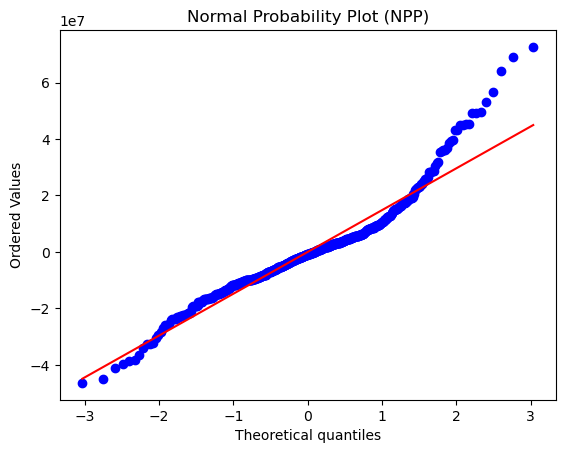

Equation:
MarketValue = -60279900.340*Intercept + 964549.700*FIFARating + 1395.158*MinutesPlayed + 1754985.157*GAContribution + 1074446.813*FantasyScore

R-squared: 0.554, Adjusted R-squared: 0.551

Durbin-Watson Score: 0.911

ANOVA Table (aggregated):
            Sum of Squares     df   Mean Square           F   PR(>F)
Regression    3.012855e+17  575.0  1.672189e+17  709.950829  0.20014
Residual      1.343018e+17  571.0  2.352045e+14                     
Total         3.012855e+17  575.0  5.239747e+14                     

Coefficients Table (with VIF):
         Variable   Coefficient  Standard Error  t-value         P>|t|    VIF
0       Intercept -6.027990e+07     7294039.543   -8.264  9.868154e-16    NaN
1      FIFARating  9.645497e+05      109298.084    8.825  1.333982e-17  1.949
2   MinutesPlayed  1.395158e+03         914.529    1.526  1.276760e-01  2.452
3  GAContribution  1.754985e+06      158078.368   11.102  4.585696e-26  1.841
4    FantasyScore  1.074447e+06      837686.902  

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv('/Users/niloy74/UoB/Data Analytics and Predictive Modelling/report.csv')

# Select only quantitative columns
quantitative_cols = ['FIFARating', 'MinutesPlayed', 'GAContribution', 'FantasyScore', 'MarketValue']
df_quant = df[quantitative_cols].dropna()  # Drop rows with missing values

# Create a formula for the regression model
formula = 'MarketValue ~ FIFARating + MinutesPlayed + GAContribution + FantasyScore'

# Fit the regression model using the formula
model = smf.ols(formula=formula, data=df_quant).fit()

# Calculate VIF scores
X_vif = df_quant[['FIFARating', 'MinutesPlayed', 'GAContribution', 'FantasyScore']]
X_vif = sm.add_constant(X_vif)  # Add constant for intercept
vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# Outputs
# 1. Equation
coefficients = model.params
equation = "MarketValue = " + " + ".join([f"{coefficients[name]:.3f}*{name}" for name in coefficients.index])

# 2. R-squared and Adjusted R-squared
r2 = model.rsquared
adj_r2 = model.rsquared_adj

# 3. Durbin-Watson Score
dw_score = sm.stats.durbin_watson(model.resid)

# 4. ANOVA Table (with aggregated Regression, Residual, and Total)
anova_results = sm.stats.anova_lm(model, typ=1)
anova_results_agg = pd.DataFrame({
    "Sum of Squares": [anova_results["sum_sq"].sum()],
    "df": [anova_results["df"].sum()],
    "Mean Square": [anova_results["mean_sq"].sum()],
    "F": [anova_results["F"].sum()],
    "PR(>F)": [anova_results["PR(>F)"].sum()]
}, index=["Regression"])

# For Residual and Total, calculate the sum of squares and degrees of freedom directly
residual_ss = model.ssr
total_ss = model.centered_tss
residual_df = model.df_resid
total_df = model.df_model + model.df_resid

anova_results_agg.loc["Residual"] = [residual_ss, residual_df, residual_ss / residual_df, "", ""]
anova_results_agg.loc["Total"] = [total_ss, total_df, total_ss / total_df, "", ""]

# 5. Coefficients Table (with VIF)
coeff_table = pd.DataFrame({
    "Coefficient": model.params.round(3),
    "Standard Error": model.bse.round(3),
    "t-value": model.tvalues.round(3),
    "P>|t|": model.pvalues  # Keep p-values unformatted
})
coeff_table = coeff_table.reset_index().rename(columns={"index": "Variable"})
coeff_table = pd.merge(coeff_table, vif_data, on="Variable", how="left")
coeff_table["VIF"] = coeff_table["VIF"].round(3)

# Save tables to Excel
anova_results_agg.to_excel("anova_results_aggregated.xlsx", index=True)
coeff_table.to_excel("coefficients_with_vif.xlsx", index=False)

# 6. Normal Probability Plot (NPP)
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot (NPP)')
plt.show()

# Print Outputs
print(f"Equation:\n{equation}")
print(f"\nR-squared: {r2:.3f}, Adjusted R-squared: {adj_r2:.3f}")
print(f"\nDurbin-Watson Score: {dw_score:.3f}")
print("\nANOVA Table (aggregated):")
print(anova_results_agg)
print("\nCoefficients Table (with VIF):")
print(coeff_table)
